In [1]:
from wifi_experiment import *

runs = restore_test_datarate_over_time(start_time_s=1, end_time_s=300,init_ns3=False)

running experiment for 1 seconds
done
running experiment for 2 seconds
done
running experiment for 3 seconds
done
running experiment for 4 seconds
done
running experiment for 5 seconds
done
running experiment for 6 seconds
done
running experiment for 7 seconds
done
running experiment for 8 seconds
done
running experiment for 9 seconds
done
running experiment for 10 seconds
done
running experiment for 11 seconds
done
running experiment for 12 seconds
done
running experiment for 13 seconds
done
running experiment for 14 seconds
done
running experiment for 15 seconds
done
running experiment for 16 seconds
done
running experiment for 17 seconds
done
running experiment for 18 seconds
done
running experiment for 19 seconds
done
running experiment for 20 seconds
done
running experiment for 21 seconds
done
running experiment for 22 seconds
done
running experiment for 23 seconds
done
running experiment for 24 seconds
done
running experiment for 25 seconds
done
running experiment for 26 seconds


In [30]:
import pandas as pd
import seaborn as sns


df_list = []

time_s = 1

for run in runs:
    should_be_df = pd.DataFrame({
        "time_s": [time_s],
        "ReceivedDataRate": [75.0],
        "type": ["should_be"]
    })
    df_list.append(should_be_df)
    df = pd.read_csv(f"output3/{run.local_summary_csv_path}" )   
    df["time_s"] = time_s
    df["type"] = "simulation"
    df_list.append(df)
    time_s += 1


df = pd.concat(df_list)

df.describe()

/tmp/ipykernel_23424/504173523.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list)


,time_s,ReceivedDataRate,FlowId,AverageRxPower
count,597.000000,597.000000,298.0,2.980000e+02
mean,150.249581,75.040101,1.0,-5.471000e+01
std,86.242029,2.337668,0.0,7.117379e-15
min,1.000000,37.900000,1.0,-5.471000e+01
25%,76.000000,75.000000,1.0,-5.471000e+01
50%,150.000000,75.000000,1.0,-5.471000e+01
75%,225.000000,75.930000,1.0,-5.471000e+01
max,299.000000,76.190000,1.0,-5.471000e+01


Text(0.5, 1.0, 'ReceivedDataRate over simulation time')

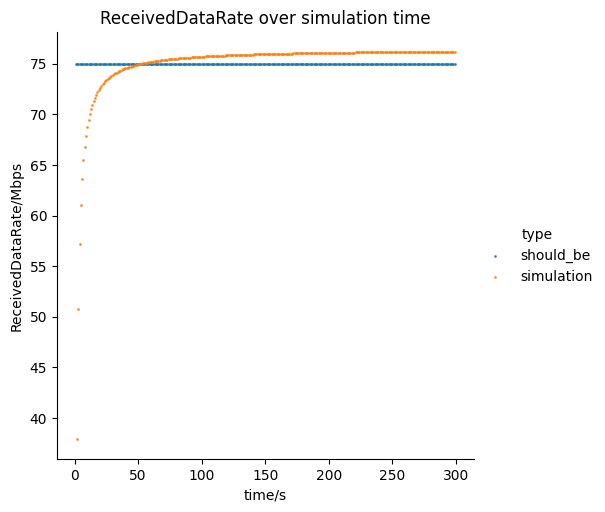

In [35]:
import matplotlib.pyplot as plt
plot = sns.lmplot(df,hue="type", x='time_s', y='ReceivedDataRate', scatter_kws={"s": 1}, fit_reg=False)
plot.set(xlabel="time/s", ylabel="ReceivedDataRate/Mbps")
plt.title("ReceivedDataRate over simulation time")

Text(0.5, 1.0, 'ReceivedDataRate over simulation time - first 3 seconds removed')

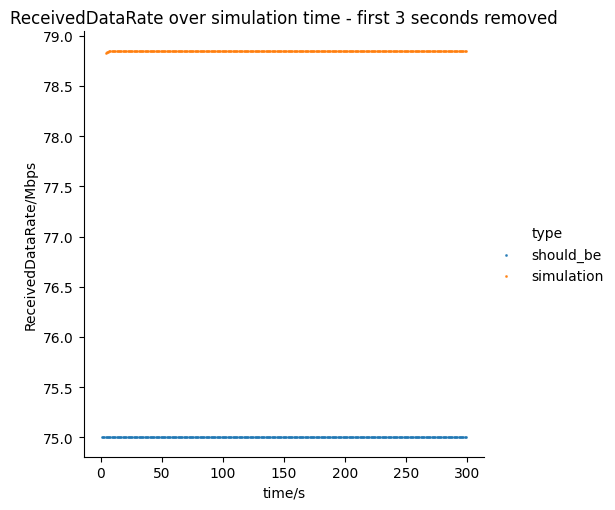

In [41]:
!cd output3
detailed_dr_df_list = []

time_s = 1
for run in runs:
    should_be_df = pd.DataFrame({
        "time_s": [time_s],
        "ReceivedDataRate": [75.0],
        "type": ["should_be"]
    })
    detailed_dr_df = pd.read_csv(f"output3/{run.local_rx_dr_csv_path}")
    detailed_dr_df_without_first_3_seconds_df = detailed_dr_df[detailed_dr_df["Time"] > 3]
    df = pd.DataFrame({
        "time_s": time_s,
        "ReceivedDataRate": detailed_dr_df_without_first_3_seconds_df["DataRate_Mbps"].mean(),
        "type": ["simulation"]
    })
    detailed_dr_df_list.append(should_be_df)
    detailed_dr_df_list.append(df)
    time_s += 1

detailed_dr_df = pd.concat(detailed_dr_df_list)
plot = sns.lmplot(detailed_dr_df,hue="type", x='time_s', y='ReceivedDataRate', scatter_kws={"s": 1}, fit_reg=False)
plot.set(xlabel="time/s", ylabel="ReceivedDataRate/Mbps")
plt.title("ReceivedDataRate over simulation time - first 3 seconds removed")

Text(0.5, 1.0, 'ReceivedDataRate over simulation time - one run')

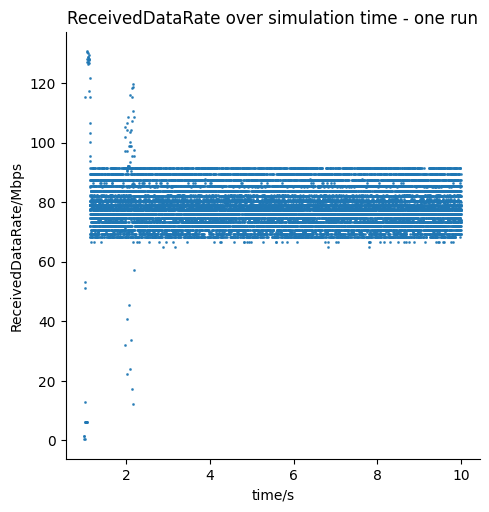

In [47]:
one_run_dr = pd.read_csv(f"output3/{runs[9].local_rx_dr_csv_path}")
plot = sns.lmplot(one_run_dr, x='Time', y='DataRate_Mbps', scatter_kws={"s": 1}, fit_reg=False)
plot.set(xlabel="time/s", ylabel="ReceivedDataRate/Mbps")
plt.title("ReceivedDataRate over simulation time - one run")

Text(0.5, 1.0, 'RxPower over simulation time - one run')

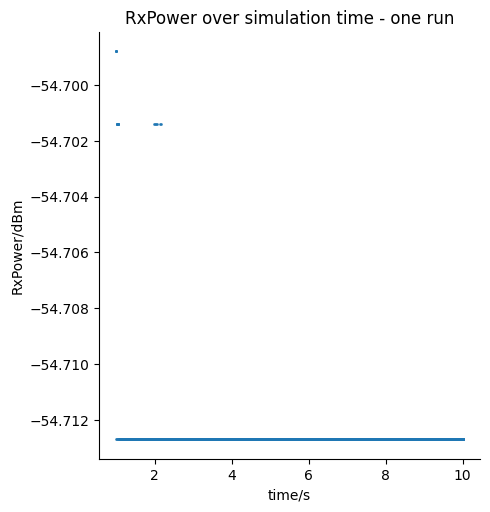

In [48]:
one_run_pwr = pd.read_csv(f"output3/{runs[9].local_rx_pwr_csv_path}")   
plot = sns.lmplot(one_run_pwr, x='Time', y='RxPower', scatter_kws={"s": 1}, fit_reg=False)
plot.set(xlabel="time/s", ylabel="RxPower/dBm")
plt.title("RxPower over simulation time - one run")